In [1]:
# ------------------------------------------------------------
# 1. IMPORT LIBRARIES
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [2]:
# 2. LOAD DATASET
# ------------------------------------------------------------
data = pd.read_csv(r"C:\Users\abina\Downloads\smart_home_energy_usage_dataset.csv")

print("Dataset Loaded Successfully")
print(data.info())
print(data.describe())

Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Home_ID              500 non-null    object 
 1   DateTime             500 non-null    object 
 2   Temperature_C        500 non-null    float64
 3   Humidity_%           500 non-null    float64
 4   Light_Lux            500 non-null    float64
 5   Appliance_Usage_kWh  500 non-null    float64
 6   HVAC_Usage_kWh       500 non-null    float64
 7   Water_Heater_kWh     500 non-null    float64
 8   Total_Energy_kWh     500 non-null    float64
 9   Motion_Sensor        500 non-null    object 
 10  Room                 500 non-null    object 
dtypes: float64(7), object(4)
memory usage: 43.1+ KB
None
       Temperature_C  Humidity_%   Light_Lux  Appliance_Usage_kWh  \
count     500.000000  500.000000  500.000000           500.000000   
mean       24.854600 

In [3]:
data.shape

(500, 11)

In [4]:
data

,Home_ID,DateTime,Temperature_C,Humidity_%,Light_Lux,Appliance_Usage_kWh,HVAC_Usage_kWh,Water_Heater_kWh,Total_Energy_kWh,Motion_Sensor,Room
0,H088,2025-01-01 00:00:00.000000000,20.1,35.8,937.0,1.31,2.39,1.15,4.85,Active,Bedroom
1,H060,2025-01-01 02:50:15.631262525,23.0,56.8,464.0,4.19,5.96,3.62,13.77,Inactive,Bathroom
2,H063,2025-01-01 05:40:31.262525050,31.6,31.1,928.0,1.69,4.98,3.18,9.85,Inactive,Bedroom
3,H055,2025-01-01 08:30:46.893787575,24.7,54.9,362.0,4.71,2.36,3.49,10.56,Inactive,Bathroom
4,H012,2025-01-01 11:21:02.525050100,19.2,59.2,114.0,0.31,6.11,5.90,12.32,Inactive,Living Room
...,...,...,...,...,...,...,...,...,...,...,...
495,H062,2025-02-28 12:38:57.474949900,15.8,38.1,389.0,1.55,6.14,2.19,9.88,Active,Living Room
496,H004,2025-02-28 15:29:13.106212425,29.9,58.0,798.0,0.93,6.17,1.89,8.99,Active,Bathroom
497,H059,2025-02-28 18:19:28.737474950,30.3,34.7,427.0,0.64,7.06,5.48,13.18,Active,Living Room
498,H066,2025-02-28 21:09:44.368737475,19.0,75.5,121.0,3.86,5.47,0.65,9.98,Inactive,Living Room


In [5]:
data

,Home_ID,DateTime,Temperature_C,Humidity_%,Light_Lux,Appliance_Usage_kWh,HVAC_Usage_kWh,Water_Heater_kWh,Total_Energy_kWh,Motion_Sensor,Room
0,H088,2025-01-01 00:00:00.000000000,20.1,35.8,937.0,1.31,2.39,1.15,4.85,Active,Bedroom
1,H060,2025-01-01 02:50:15.631262525,23.0,56.8,464.0,4.19,5.96,3.62,13.77,Inactive,Bathroom
2,H063,2025-01-01 05:40:31.262525050,31.6,31.1,928.0,1.69,4.98,3.18,9.85,Inactive,Bedroom
3,H055,2025-01-01 08:30:46.893787575,24.7,54.9,362.0,4.71,2.36,3.49,10.56,Inactive,Bathroom
4,H012,2025-01-01 11:21:02.525050100,19.2,59.2,114.0,0.31,6.11,5.90,12.32,Inactive,Living Room
...,...,...,...,...,...,...,...,...,...,...,...
495,H062,2025-02-28 12:38:57.474949900,15.8,38.1,389.0,1.55,6.14,2.19,9.88,Active,Living Room
496,H004,2025-02-28 15:29:13.106212425,29.9,58.0,798.0,0.93,6.17,1.89,8.99,Active,Bathroom
497,H059,2025-02-28 18:19:28.737474950,30.3,34.7,427.0,0.64,7.06,5.48,13.18,Active,Living Room
498,H066,2025-02-28 21:09:44.368737475,19.0,75.5,121.0,3.86,5.47,0.65,9.98,Inactive,Living Room


In [6]:
# 4. HANDLE CATEGORICAL VARIABLES
# ------------------------------------------------------------
# Remove household_id, DateTime
data = data.drop(["Home_ID","DateTime"], axis=1)

In [7]:
# Label Encode binary categorical feature
label1 = LabelEncoder()
label2 = LabelEncoder()
data["Motion_Sensor"] = label1.fit_transform(data["Motion_Sensor"])
data["Room"] = label2.fit_transform(data["Room"])

In [8]:
# 5. DEFINE TARGET AND FEATURES
# ------------------------------------------------------------
target = "Total_Energy_kWh"
X = data.drop(target, axis=1)
y = data[target]

In [9]:
# 6. SCALING (MinMaxScaler)
# ------------------------------------------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 7. TRAIN TEST SPLIT
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# 8. MODEL TRAINING (SEPARATE MODELS)
# ------------------------------------------------------------

# --- Linear Regression ---
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

In [12]:
# --- Decision Tree ---
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)

In [13]:
# --- Random Forest ---
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)

In [14]:
# --- XGBRegressor ---
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)



In [15]:
# --- GradientBoostingRegressor ---
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

gbr_pred = gbr.predict(X_test)
gbr_score = gbr.score(X_train, y_train)
gbr_test_score = rf.score(X_test, y_test)


In [16]:
print("\nMODEL SCORES")
print("----------------------------------")

print(f"Random Forest Train Score:     {rf_train_score:.3f}")
print(f"Random Forest Test Score:      {rf_test_score:.3f}\n")

print(f"Linear Regression Train Score: {lr_train_score:.3f}")
print(f"Linear Regression Test Score:  {lr_test_score:.3f}\n")

print(f"Decision Tree Train Score:     {dt_train_score:.3f}")
print(f"Decision Tree Test Score:      {dt_test_score:.3f}\n")


print(f"XGBRegressor Train Score:     {xgb_train_score:.3f}")
print(f"XGBRegressor Test Score:      {xgb_test_score:.3f}\n")

print(f"Gradient Boosting Train Score:     {gbr_score:.3f}")
print(f"Gradient Boosting Test Score:      {gbr_test_score:.3f}\n")



MODEL SCORES
----------------------------------
Random Forest Train Score:     0.996
Random Forest Test Score:      0.971

Linear Regression Train Score: 1.000
Linear Regression Test Score:  1.000

Decision Tree Train Score:     1.000
Decision Tree Test Score:      0.925

XGBRegressor Train Score:     1.000
XGBRegressor Test Score:      0.971

Gradient Boosting Train Score:     0.997
Gradient Boosting Test Score:      0.971



In [17]:
# 9.  CROSS VALIDATION (5-FOLD)
# ------------------------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_cv_score = cross_val_score(rf, X_scaled, y, cv=kf, scoring="r2")

print("\nRandom Forest CV Scores:", rf_cv_score)
print("Average CV Score:", rf_cv_score.mean())


Random Forest CV Scores: [0.97086506 0.96214109 0.97206139 0.96782345 0.96469524]
Average CV Score: 0.9675172450544292


In [18]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)
print("Best Score:", rf_grid.best_score_)

# print("Train Score:", rf_grid.score(X_train, y_train))
# print("Test Score:", rf_grid.score(X_test, y_test))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9590028065215618


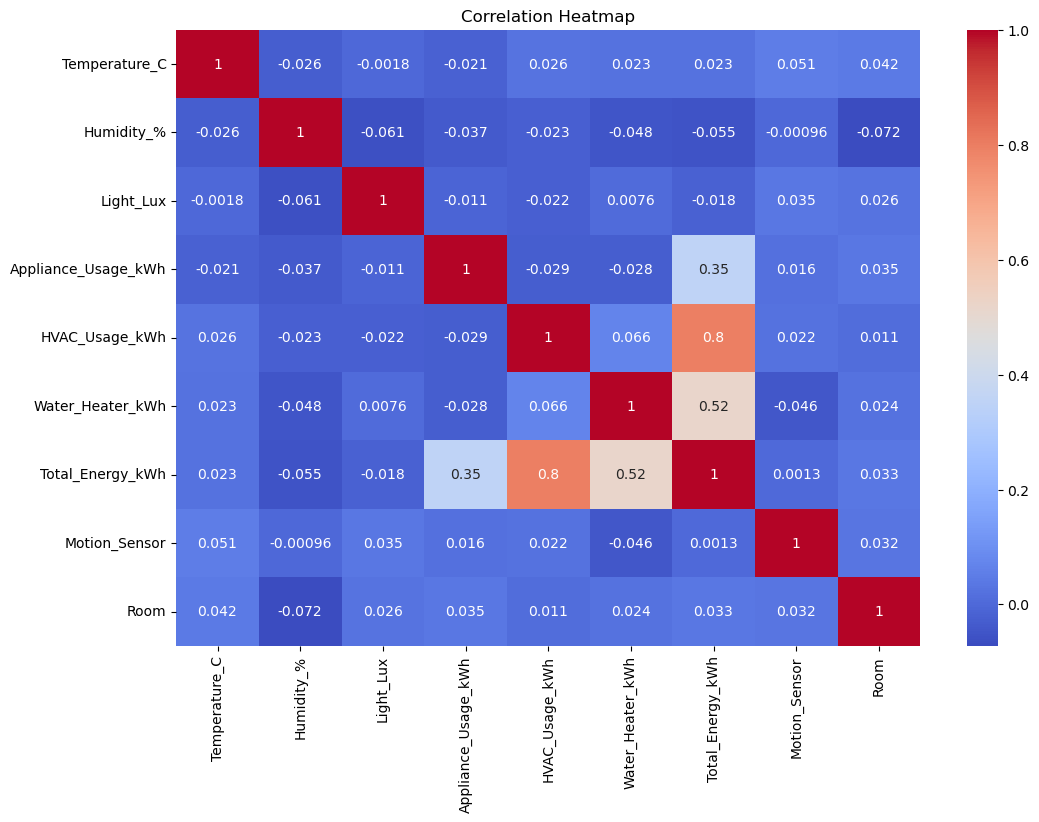

In [19]:
# 7. SEABORN CORRELATION HEATMAP
# ===============================
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

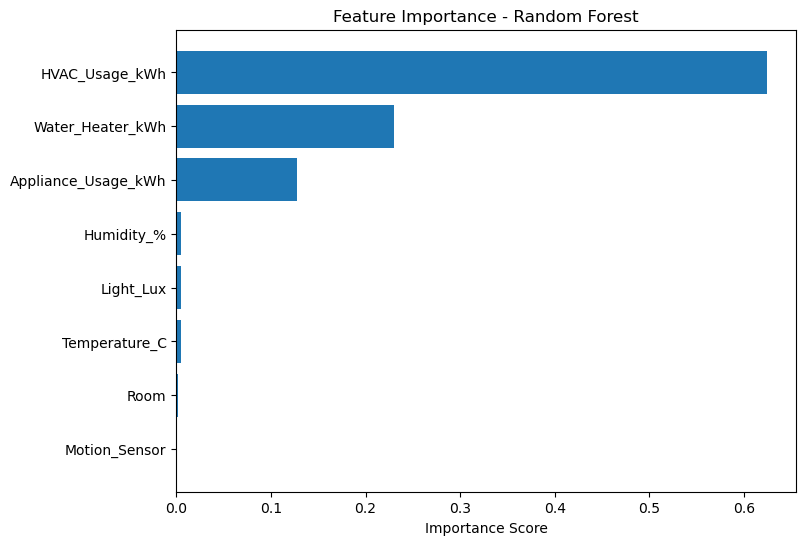

In [20]:
# 11. FEATURE IMPORTANCE (Random Forest)
# ------------------------------------------------------------
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()

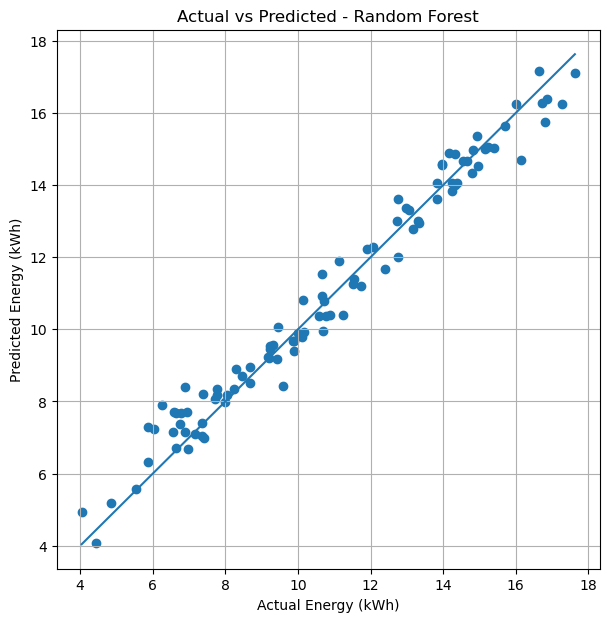

In [21]:
# 12. ACTUAL vs PREDICTED GRAPH
# ------------------------------------------------------------
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Energy (kWh)")
plt.ylabel("Predicted Energy (kWh)")
plt.title("Actual vs Predicted - Random Forest")
plt.grid(True)
plt.show()

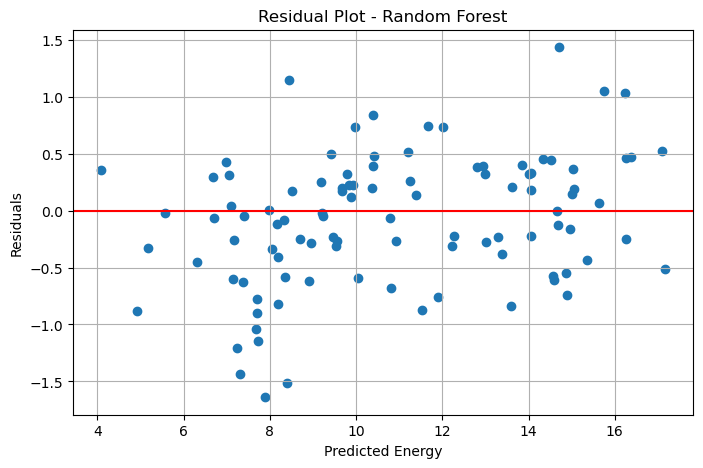

In [22]:
# 14. RESIDUAL PLOT
# ------------------------------------------------------------
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,5))
plt.scatter(y_pred_rf, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Energy")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest")
plt.grid(True)
plt.show()

In [24]:
import pickle

# Save the scaler
with open('promotion_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the LABEL ENCODERS
with open('LE1.pkl', 'wb') as f:
    pickle.dump(label1, f)

with open('LE2.pkl', 'wb') as f:
    pickle.dump(label2, f)

# Save the model
with open('RandomForest.pkl', 'wb') as f:
    pickle.dump(rf, f)